In [44]:
import pandas as pd
import numpy as np
bank_data = pd.read_csv("bank_data.csv")
bank_data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


## Data Transformation

In [45]:
# ID's are not useful
bank_data = bank_data.drop("id", axis='columns')

# subset data for only Level 0 and 1 Recovery
bank_data = bank_data[bank_data["recovery_strategy"].str.contains("Level 0 Recovery|Level 1 Recovery")]
bank_data.head()

expected_recovery_amount      int64
actual_recovery_amount      float64
recovery_strategy            object
age                           int64
sex                          object
dtype: object

In [63]:
import statsmodels.formula.api as smf
rdd_df = bank_data.assign(threshold=(bank_data["expected_recovery_amount"] > 1000).astype(int))
rdd_df = rdd_df.assign(running_var=(bank_data["expected_recovery_amount"] - 1000).astype(int))
rdd_df_bandwidth = rdd_df[(rdd_df["expected_recovery_amount"] >= 800) & (rdd_df["expected_recovery_amount"] <= 1200)]
model = smf.ols("actual_recovery_amount~threshold+running_var+running_var*threshold", rdd_df_bandwidth).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,669.5706,37.068,18.063,0.000,596.642,742.500
threshold,244.0563,53.578,4.555,0.000,138.644,349.469
running_var,1.0837,0.365,2.966,0.003,0.365,1.802
running_var:threshold,-0.4303,0.502,-0.858,0.392,-1.417,0.557


Text(0.5, 1.0, 'Regression Discontinuity')

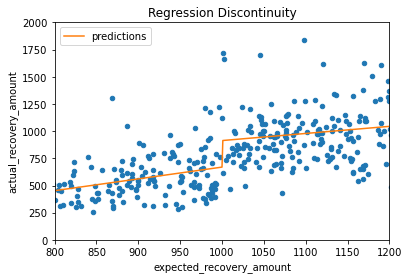

In [65]:
import matplotlib.pyplot as plt
ax = bank_data.plot.scatter(x="expected_recovery_amount",y="actual_recovery_amount")
ax.set_xlim([800, 1200])
ax.set_ylim([0,2000])

bank_data.assign(predictions=model.fittedvalues).plot(x="expected_recovery_amount",y="predictions",ax=ax,
                                                     color="C1")
plt.title("Regression Discontinuity")